In [56]:
F = lambda x: x/2

In [57]:
x0, tol, maxiter = 10 , 1e-9, 8

In [58]:
for k in range(maxiter):
    print(x0, end = '  ')
    x1 = F(x0)
    if abs(x1 - x0) < tol:
        break
    x0 = x1

10  5.0  2.5  1.25  0.625  0.3125  0.15625  0.078125  

### Newton's method in one dimension

In [59]:
def newton(F, x0, Fp, *args ,tol = 10e-5, maxiter=15, **kwargs):
    for k in range(maxiter):
        print(x0, end = '  ')
        x1 = x0 - F(x0)/Fp(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1

In [60]:
import math

In [61]:
F1 = lambda x : math.exp(x) - 2
F1p = lambda x: math.exp(x)

In [62]:
newton(F1, 3, F1p)

3  2.099574136735728  1.3445913148420177  0.8658837315075016  0.7072429724520415  0.6932460610894609  

In [63]:
F2 = lambda x : math.pow(x, 4) - 2
F2p = lambda x: 4*math.pow(x, 3)

In [64]:
newton(F2, 3, F2p)

3  2.2685185185185186  1.7442183902021173  1.4023890692126304  1.2330778785875376  1.1914933448318163  1.189213686794206  

In [65]:
from scipy.optimize import newton

In [66]:
newton(F1, 3)

0.6931471805599454

In [67]:
newton(F2, 3)

1.189207115002721

### Computing the interest rate of the following function

In [68]:
def f(r, *, N1 = 30, N2 = 20, P1 = 2000, P2 = 8000):
    return P1*(math.pow((1 + r), N1) - 1) - P2*(1 - math.pow((1 + r), -N2)) 

In [69]:
def f_p(r, *, N1 = 30, N2 = 20, P1 = 2000, P2 = 8000):
    return P1*N1*(math.pow((1 + r), N1 - 1)) + P2*N2*(math.pow((1 + r), -N2-1))

In [70]:
def newton_(F, x0, Fp, *args ,tol = 10e-5, maxiter=15, **kwargs):
    for k in range(maxiter):
        print(x0, end = '  ')
        x1 = x0 - F(x0)/Fp(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1

In [71]:
newton_(f, 0.1, f_p)

0.1  0.07319932178867032  0.056062289697879145  0.047423959751489414  0.04330375535747452  0.04123232483439167  0.040137400277632386  0.039540105525007224  0.03920823821813561  0.03902190097712219  0.0389166486211166  

In [72]:
newton(f, 0.1)

0.038778432029803495

### Newton's method with backtracking

**Backtracking** : $ x_{k+1} = x_{k} - \alpha * \frac{f(x_{k})}{f'(x_{k})} $, where $\alpha \in (0, 1]$

In [73]:
def newton_2(F, x0, Fp, *args, α = 1, tol = 10e-5, maxiter=15, **kwargs):
    for k in range(maxiter):
        print(x0, end = '  ')
        x1 = x0 - α * F(x0)/Fp(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1

In [74]:
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_p = lambda x: x* np.sign(x) * 1/3 * np.power(np.abs(x), -5./3)

In [75]:
newton_2(f, 0.01, f_p) #NO CONVERGENCE!

0.01  -0.019999999999999997  0.03999999999999999  -0.07999999999999996  0.15999999999999986  -0.31999999999999973  0.6399999999999993  -1.2799999999999985  2.5599999999999965  -5.119999999999994  10.23999999999999  -20.479999999999983  40.95999999999998  -81.91999999999996  163.83999999999997  

In [76]:
newton_2(f, 0.01, f_p, α=0.4) #CONVERGES!!

0.01  -0.0019999999999999983  0.0003999999999999989  -7.999999999999961e-05  

Main takeaway: It is sometimes better to use backtracking but it is hard to find the right $\alpha$

In [77]:
def newton_2_mod(F, x0, Fp, *args, α = 1, tol = 10e-5, maxiter=150, **kwargs):
    it = 0
    for k in range(maxiter):
        x1 = x0 - α * F(x0)/Fp(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
        it += 1
    return it

In [78]:
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_p = lambda x: x* np.sign(x) * 1/3 * np.power(np.abs(x), -5./3)

In [79]:
interval = np.linspace(0.001, 1, 1000)

In [80]:
mi = list()
for a in interval:
    mi.append(newton_2_mod(f, 0.01, f_p, α = a))

In [81]:
import matplotlib.pyplot as plt

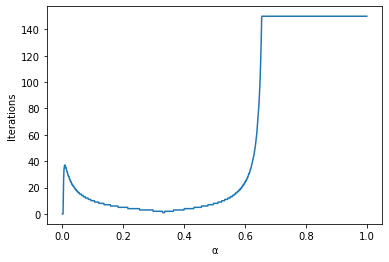

In [82]:
fig, ax = plt.subplots()
ax.plot(interval, mi, label = 'Iterations')
plt.xlabel('α')
plt.ylabel('Iterations')
plt.show()

In [83]:
min(mi)

0

### Newton’s Method in Higher Dimensions

In [84]:
import numpy as np
import scipy.linalg as la

In [85]:
def newton_vec(F, x0, Fp, *args ,tol = 10e-5, maxiter=15, **kwargs):
    
    if np.isscalar(x0):
        
        for k in range(maxiter):
            print(x0, end = '  ')
            x1 = x0 - F(x0)/Fp(x0)
            if abs(x1 - x0) < tol:
                break
            x0 = x1
    else:
        
        for k in range(maxiter):
            print(x0, end = '  ')
            y = la.solve(Fp(*x0), F(*x0))
            x1 = x0 - y
            if la.norm(x1 - x0) < tol:
                break
            x0 = x1
    
    return x1

In [86]:
def newton_vec_2(F, x0, Fp, *args , α = 1, tol = 10e-5, maxiter=15, **kwargs):
    
    if np.isscalar(x0):
        
        for k in range(maxiter):
            print(x0, end = '  ')
            x1 = x0 - α * F(x0)/Fp(x0)
            if abs(x1 - x0) < tol:
                break
            x0 = x1
    else:
        
        for k in range(maxiter):
            print(x0, end = '  ')
            y = la.solve(Fp(*x0), F(*x0))
            x1 = x0 - α * y
            if la.norm(x1 - x0) < tol:
                break
            x0 = x1
            
    return x1

**Solving the equation system:**
$$ \gamma x y - x (1 + y) = 0 $$
$$ -x y + (\delta - y)(1 + y) = 0 $$

In [87]:
import sympy as sp

In [88]:
x,y,γ,δ = sp.symbols('x,y,γ,δ', real=True)
f1 = γ*x*y - x*(1+y)
f2 = -x*y + (δ - y)*(1 + y)
F = sp.Matrix([f1,f2])
J = F.jacobian([x, y])

In [89]:
J

Matrix([
[y*γ - y - 1,          x*γ - x],
[         -y, -x - 2*y + δ - 1]])

In [90]:
def DF(x, y, *, δ = 1, γ = 5):
    return [[γ*y - y - 1, x*γ - x], [-y, -x - 2*y + δ -1]]

In [91]:
def F(x, y, *, δ = 1, γ = 5):
    return [γ*x*y - x*(1 + y), -x*y + (δ - y)*(1 + y)]

In [92]:
newton_vec_2(F, [-0.2, 0.2], DF) #(0, -1)

[-0.2, 0.2]  [ 6.4 -1.4]  [ 2.03443709 -0.87549669]  [-0.32490476 -1.05524137]  [-0.01300739 -1.00298674]  [-3.09194513e-05 -1.00000830e+00]  

array([-2.05313103e-10, -1.00000000e+00])

In [93]:
newton_vec_2(F, [0.1, 0.1], DF) #(0, 1)

[0.1, 0.1]  [1.8 2.8]  [0.89023861 1.53882863]  [0.32527682 1.06791435]  [0.02742679 0.9989492 ]  [-3.86783276e-05  1.00000539e+00]  

array([-2.78095354e-10,  1.00000000e+00])

In [94]:
x = np.arange(0, 0.25, 0.01)
y = np.arange(-0.25, 0, 0.01)

In [95]:
newton_vec_2(F, [0.3, 0.2], DF) #(3.75, 0.25)

[0.3, 0.2]  [3.03157895 0.70526316]  [13.16538258 -1.27182989]  [14.02569242  0.34944604]  [3.58256106 0.32404469]  [3.78265111 0.24586452]  [3.75013832 0.24996445]  [3.75000001 0.25      ]  

array([3.75, 0.25])